In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import pandas as pd

In [2]:
infile = open("1.txt", "r")

In [3]:
rawdata = infile.read()

In [4]:
# rawdata

In [5]:
def cleanData(rawtext):
    out_text = rawtext.lower()
    out_text = out_text.replace("\n", " ")
    out_text = out_text.replace(".", " ").replace(",", "")
    out_text = out_text.replace("(", "").replace(")", "")
    out_text = out_text.replace(";", "").replace(":", "")
    
    return out_text

In [6]:
cleanData("Hello. I am a list, list, list")

'hello  i am a list list list'

In [7]:
jd_clean_data = cleanData(rawdata)

In [8]:
jd_list_words = jd_clean_data.split()

In [9]:
len(jd_list_words)

540

In [10]:
# Counter(["a", "a", "a", "a", "b"])

In [11]:
jd_wordcounts = Counter(jd_list_words)

In [12]:
sorted(jd_wordcounts, key=jd_wordcounts.get, reverse=True)

['data',
 'and',
 'to',
 'the',
 'in',
 'of',
 'quality',
 'work',
 'business',
 'with',
 'as',
 'axa',
 'our',
 'their',
 'analytics',
 'skills',
 'is',
 'a',
 'will',
 'an',
 'source',
 'analysis',
 'for',
 'learn',
 'issues',
 'technical',
 'vs',
 'or',
 'understand',
 'transformation',
 'create',
 'solutions',
 'incorrect',
 'errors',
 'using',
 'relevant',
 'experience',
 'statistical',
 'science',
 'we',
 'them',
 'team',
 'who',
 'individual',
 'perform',
 'this',
 'interface',
 'documents',
 'by',
 'identify',
 'document',
 'logic',
 'creating',
 'products',
 'are',
 'metadata',
 'such',
 'tools',
 'also',
 'investigate',
 'facilitate',
 'metrics',
 'governance',
 'rules',
 'desired',
 'qualifications',
 'software',
 'been',
 'environment',
 'great',
 'place',
 'employees',
 'office',
 'lean',
 'currently',
 'seeking',
 'manager',
 'be',
 'contributor',
 'depth',
 'requirementscreate',
 'completing',
 'target',
 'mappings',
 'well',
 '&',
 'join',
 'ensure',
 'developed',
 'acc

In [13]:
jd_wordcounts["data"]

36

In [14]:
def stopRemover(listofwords):
    
    stop_words = ["and", "to", "they", "of", "the", "in", "with", "a", "an", "our", "is", "will", "be", "on", "and/or", "&", "as", "by", "this", "for", "their"]
    
    return [w for w in listofwords if w not in stop_words]

In [15]:
# stopRemover(["today", "is", "to", "die", "for"])

In [16]:
jd_nostp_words = stopRemover(jd_list_words)

In [17]:
def contextWindow(listwords, idx, n=1):
    start = idx-n if idx-n > 0 else 0 
    stop = idx+n 
    
    return listwords[start:stop+1]

In [18]:
for i,w in enumerate(jd_nostp_words):
    print(contextWindow(jd_nostp_words, i))

['data', 'analytics']
['data', 'analytics', 'office']
['analytics', 'office', 'lean']
['office', 'lean', 'team']
['lean', 'team', 'who']
['team', 'who', 'currently']
['who', 'currently', 'seeking']
['currently', 'seeking', 'data']
['seeking', 'data', 'analytics']
['data', 'analytics', 'manager']
['analytics', 'manager', 'who']
['manager', 'who', 'individual']
['who', 'individual', 'contributor']
['individual', 'contributor', 'perform']
['contributor', 'perform', 'source']
['perform', 'source', 'data']
['source', 'data', 'analysis']
['data', 'analysis', 'understand']
['analysis', 'understand', 'data']
['understand', 'data', 'depth']
['data', 'depth', 'individual']
['depth', 'individual', 'work']
['individual', 'work', 'business']
['work', 'business', 'understand']
['business', 'understand', 'requirementscreate']
['understand', 'requirementscreate', 'business']
['requirementscreate', 'business', 'interface']
['business', 'interface', 'documents']
['interface', 'documents', 'completing']


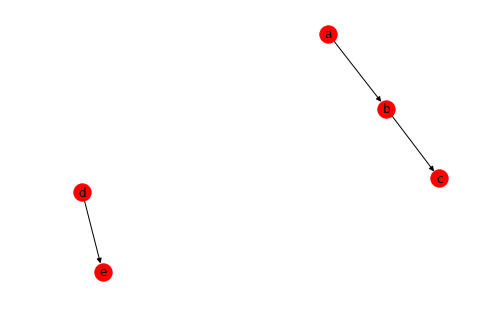

In [19]:
G = nx.DiGraph()
G.add_edge("a", "b")
G.add_edge("b", "c")
G.add_edge("d", "e")

nx.draw(G, with_labels=True)
plt.show()

In [20]:
G = nx.DiGraph()

for i,w in enumerate(jd_nostp_words):
    _l = contextWindow(jd_nostp_words, i)
    if len(_l) == 3:
        G.add_edge(_l[0], _l[1])
        G.add_edge(_l[1], _l[2])

In [21]:
G.nodes()

NodeView(('data', 'analytics', 'office', 'lean', 'team', 'who', 'currently', 'seeking', 'manager', 'individual', 'contributor', 'perform', 'source', 'analysis', 'understand', 'depth', 'work', 'business', 'requirementscreate', 'interface', 'documents', 'completing', 'target', 'mappings', 'well', 'identify', 'document', 'join', 'transformation', 'logic', 'creating', 'products', 'ensure', 'are', 'developed', 'accordance', 'create', 'metadata', 'such', 'dictionary', 'glossaries', 'learn', 'axa', 'analytic', 'tools', 'solutions', 'based', 'focus', 'role', 'analyst', 'also', 'investigate', 'quality', 'issues', 'determine', 'functional', 'technical', 'facilitate', 'stewardship', 'domain', 'partners', 'metrics', 'track', 'prioritize', 'it', 'counterparts', 'find', 'root', 'cause', 'delivery', 'incorrect', 'vs', 'errors', 'using', 'support', 'governance', 'administering', 'enforce', 'processes', 'rules', 'utilize', 'repository', 'correct', 'reflect', 'changes', 'definitions', 'lineage', 'inform

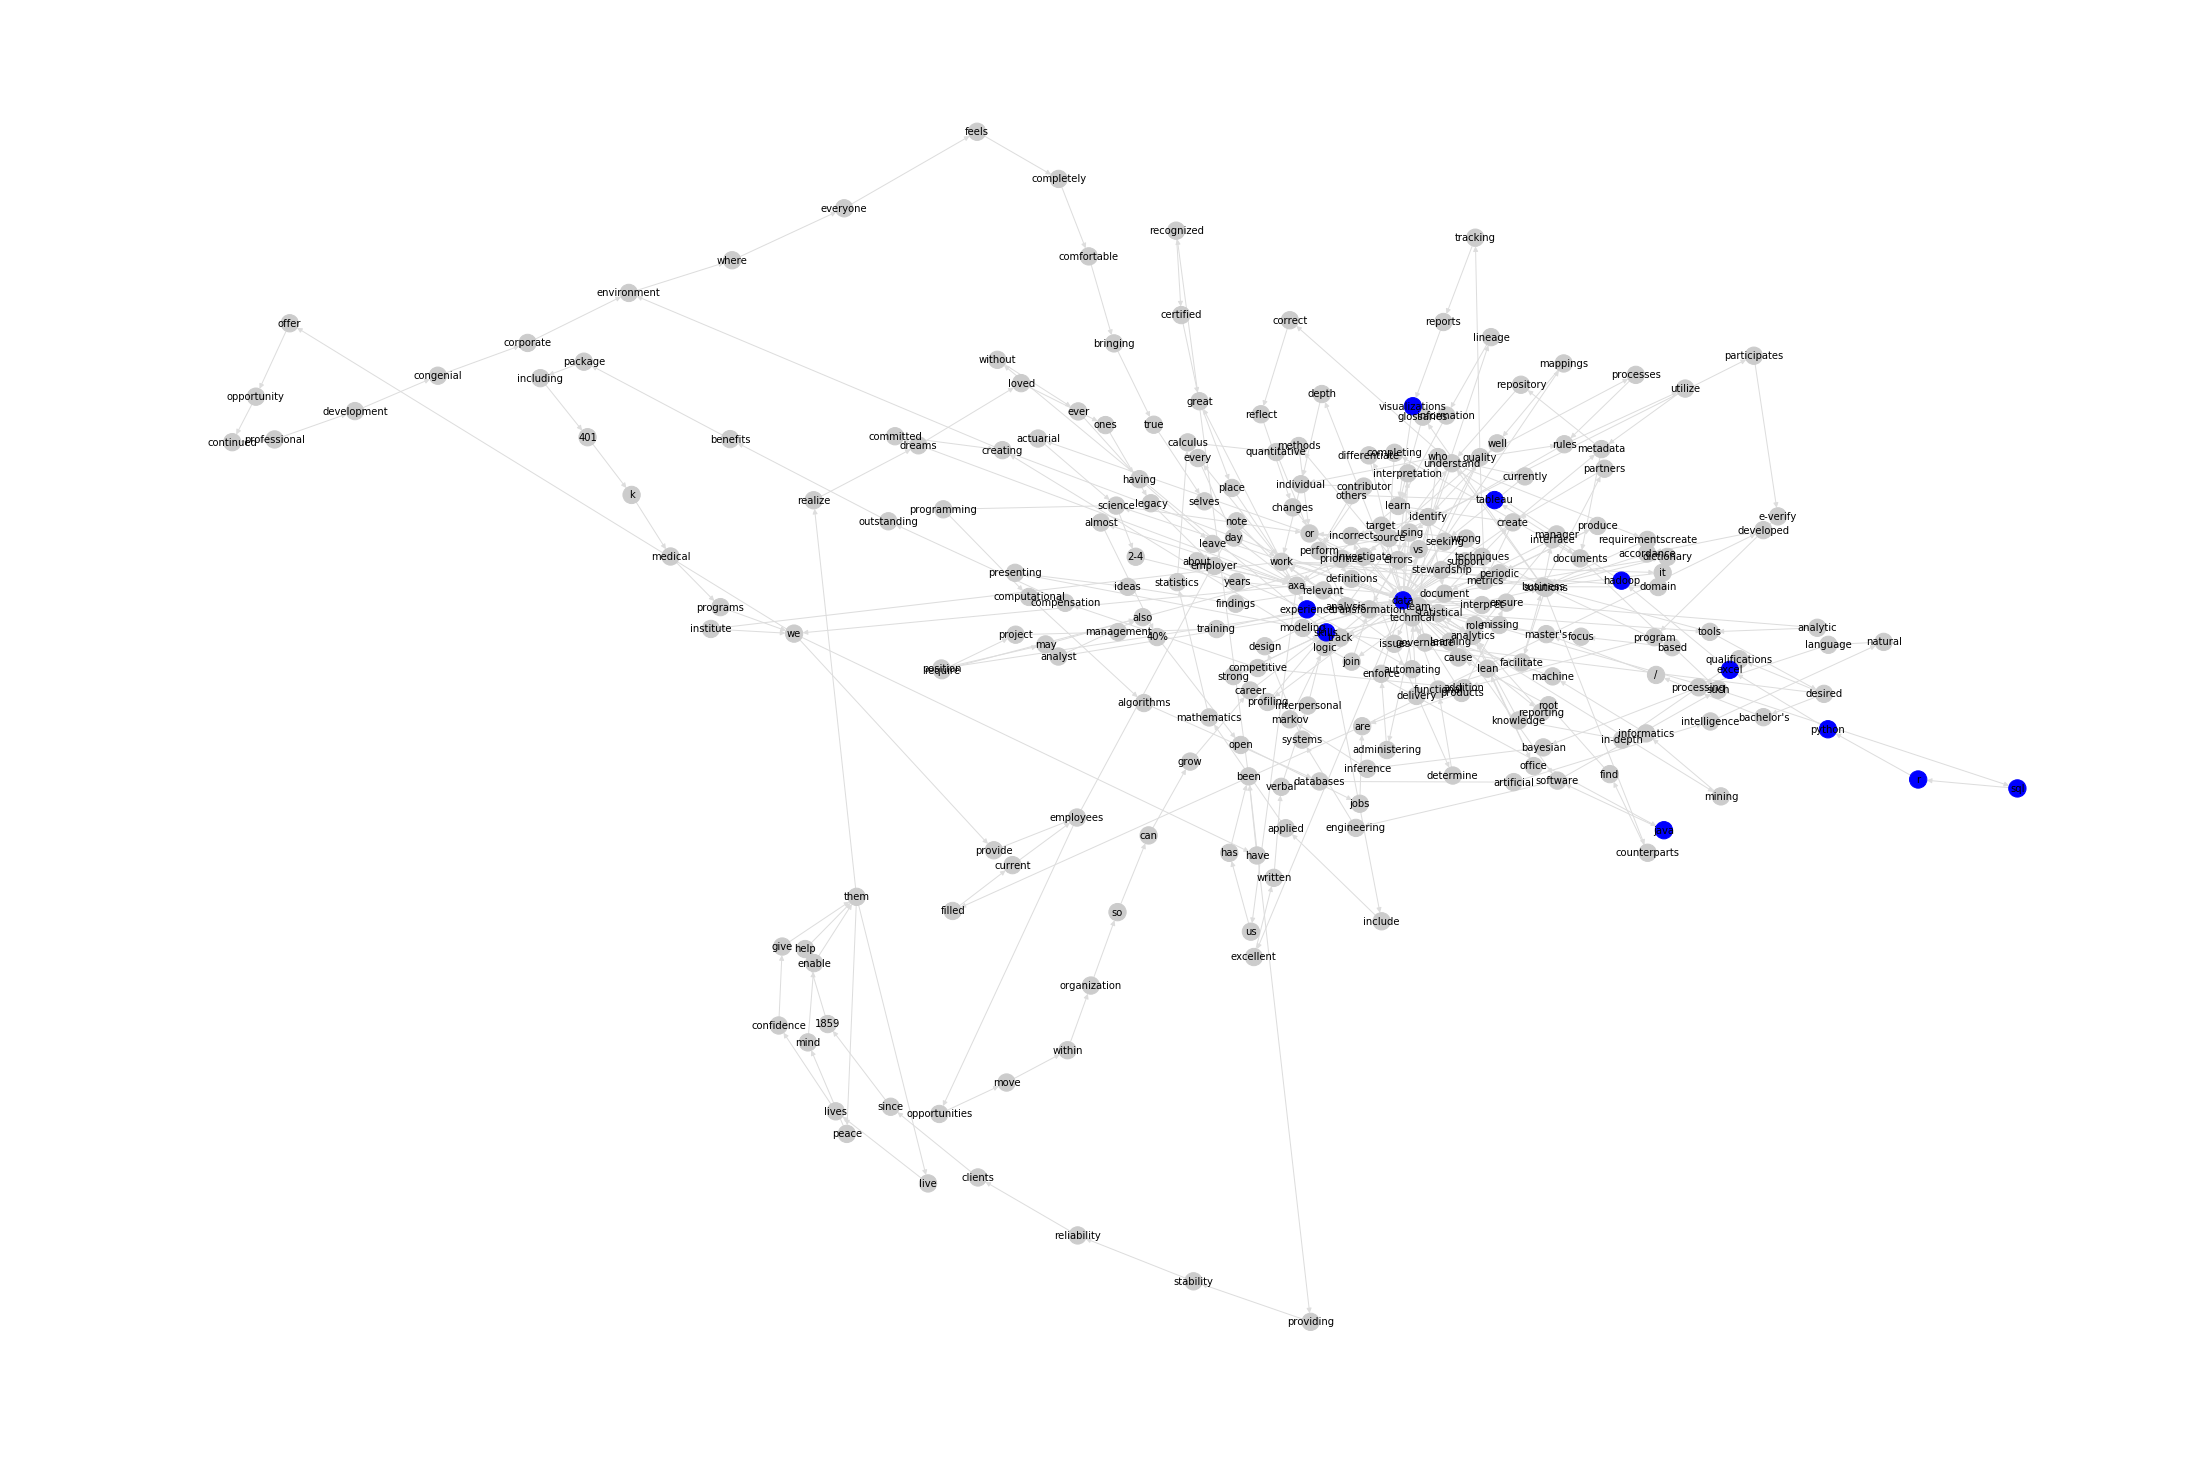

In [22]:
plt.figure(figsize=(30,20))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G, k=1/50), 
        node_color=["#cccccc" if n not in ['skills', 'experience', 'python', 'r', 'sql', 'data', 'tableau', 'visualizations', 'java', 'excel', 'hadoop'] else "blue" for n in G.nodes()], line_widths=0, 
        font_size=10, edge_color="#dddddd"
       )
plt.show()

In [23]:
nx.betweenness_centrality(G)

{'data': 0.6727922899506733,
 'analytics': 0.108915239350022,
 'office': 0.004540749105966497,
 'lean': 0.004540749105966497,
 'team': 0.020758830541439236,
 'who': 0.01741012610577828,
 'currently': 0.007973105799192755,
 'seeking': 0.007973105799192755,
 'manager': 0.007238534412447456,
 'individual': 0.02029090072568333,
 'contributor': 0.00481000481000481,
 'perform': 0.03225840182361922,
 'source': 0.03855009724574941,
 'analysis': 0.06467966413618587,
 'understand': 0.04768679100977237,
 'depth': 0.01085388041909781,
 'work': 0.2732709377119315,
 'business': 0.10063725094780981,
 'requirementscreate': 0.0027945829188065203,
 'interface': 0.020345648140679202,
 'documents': 0.020324062870646722,
 'completing': 0.0008156095112616851,
 'target': 0.0,
 'mappings': 0.00682669642296972,
 'well': 0.006826696422969735,
 'identify': 0.012845476354793129,
 'document': 0.006953855323420541,
 'join': 0.0008435807348850827,
 'transformation': 0.03487828596524244,
 'logic': 0.07066001631219014

In [24]:
bc = nx.betweenness_centrality(G)

In [25]:
pd.DataFrame({"node": list(bc.keys()), "betweeness_centrality_score": list(bc.values())})

,node,betweeness_centrality_score
0,data,0.672792
1,analytics,0.108915
2,office,0.004541
3,lean,0.004541
4,team,0.020759
5,who,0.017410
6,currently,0.007973
7,seeking,0.007973
8,manager,0.007239
9,individual,0.020291


In [26]:
bcdf = pd.DataFrame({"node": list(bc.keys()), "betweeness_centrality_score": list(bc.values())})

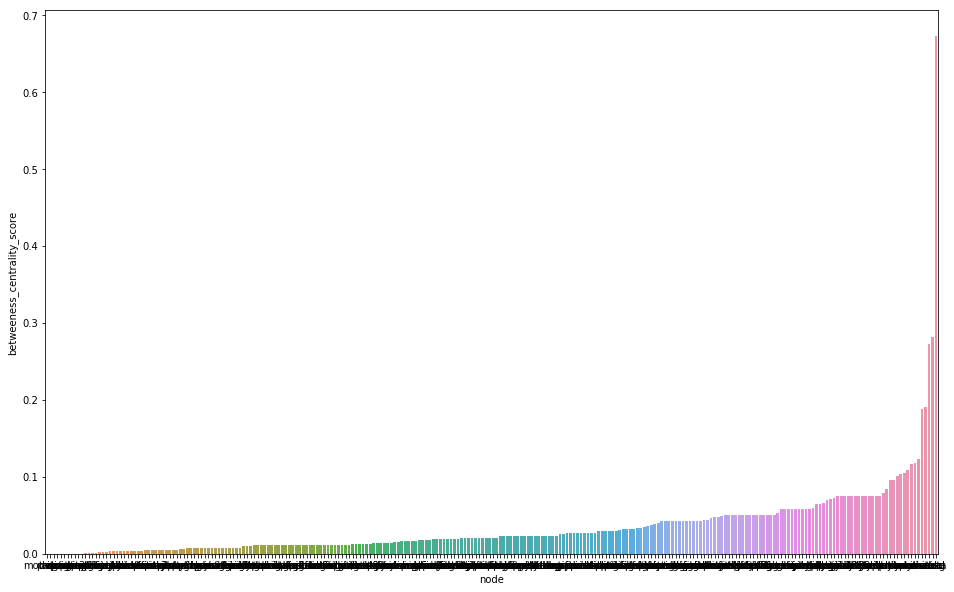

In [27]:
plt.figure(figsize=(16,10))
sns.barplot(data=bcdf.sort_values(by="betweeness_centrality_score"), x="node", y="betweeness_centrality_score")
plt.show()

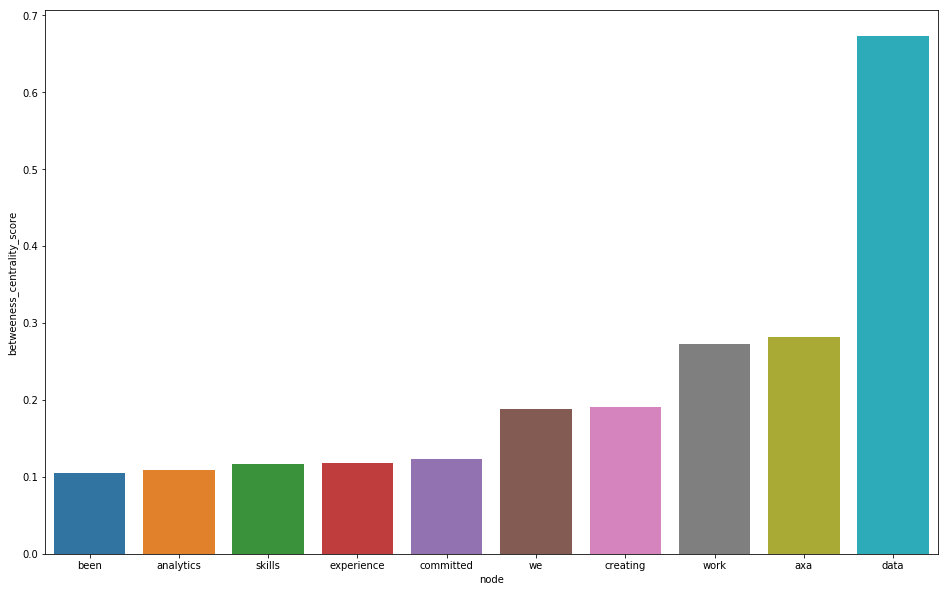

In [28]:
plt.figure(figsize=(16,10))
sns.barplot(data=bcdf.sort_values(by="betweeness_centrality_score").tail(10), x="node", y="betweeness_centrality_score")
plt.show()